# Part B: Co-word Network of Keywords from Theses Related to Dr. Babak Teimourpour

## Description
This part extracts and constructs the **co-word network** of keywords associated with the theses and papers of **Dr. Babak Teimourpour** from the **Irandoc** dataset used previously.

### Objectives
- **Data Extraction**: Retrieve and preprocess the co-word network data from the provided JSON file.
- **Network Analysis**:
  - Construct the co-word network using **igraph**.
  - Calculate at least two centrality measures (e.g., degree centrality, betweenness centrality).
  - Visualize the network with node sizes proportional to their centralities.
- **Visualization**:
  - Plot a scatter plot for the centralities of the network’s nodes.
  - Export centralities from **igraph** to visualize in **Gephi** (centralities should not be calculated in Gephi).
- **Interpretation**:
  - Identify and analyze the most significant nodes in the network.
  - Discuss the implications of these nodes in relation to Dr. Teimourpour's research.
- **Matrix Operations**:
  - Use **numpy** for matrix multiplication to obtain single-mode networks.

### Expected Outcomes
By the end of this part, you will understand how to construct and analyze a co-word network, visualize centralities, and interpret keyword significance in academic research. You will also gain familiarity with using **igraph** and **numpy** for network analysis tasks.

Step 1: Importing Required Libraries

In [1]:
# Import necessary libraries for handling graphs, matrix multiplication, and plotting
import json
import numpy as np
from igraph import *
import matplotlib.pyplot as plt

Step 2: Loading and Processing Data

In [2]:
# Load the JSON data (containing theses and keywords)
with open('test.json', 'r', encoding='utf-8') as file:
    theses_data = json.load(file)

# Create two lists: one for thesis titles and another for unique keywords
thesis_titles = []  # Titles of theses or papers
unique_keywords = []  # Unique keywords

# Populate the lists with data from the JSON file
for thesis in theses_data:
    thesis_titles.append(thesis['title'])  # Add the thesis title to the list
    for keyword in thesis['tag']:  # Iterate through the tags/keywords
        if keyword not in unique_keywords:  # Check for uniqueness
            unique_keywords.append(keyword)  # Add the keyword to the list if it's not already present

Step 3: Creating the keyword occurrences Matrix

In [3]:
# Create a matrix for keyword occurrences (theses by keywords)
co_word_matrix = np.zeros(shape=(len(thesis_titles), len(unique_keywords)))

# Populate the matrix with 1s where a thesis contains a keyword
for i in range(len(thesis_titles)):
    for j in range(len(unique_keywords)):
        if unique_keywords[j] in theses_data[i]['tag']:  # Check if the keyword exists in the thesis tags
            co_word_matrix[i][j] = 1  # Set matrix entry to 1 if the keyword is present

Step 4: Matrix Multiplication to Create the Co-word Network

In [4]:
# Create the co-word network matrix using matrix multiplication
co_word_matrix_transpose = co_word_matrix.transpose()  # Transpose the co-word matrix
co_occurrence_matrix = np.dot(co_word_matrix_transpose, co_word_matrix)  # Create the co-occurrence matrix

Step 5: Building the Graph from the Co-word Network

In [5]:
# Create an undirected graph from the co-occurrence matrix
co_word_graph = Graph.Adjacency(co_occurrence_matrix, mode="undirected")  # Use the co-occurrence matrix

# Assign labels to the graph nodes (keywords)
co_word_graph.vs["label"] = unique_keywords  # Use the unique keywords for labels

# Save the graph to a file for future use
co_word_graph.write_graphml("tags_mode2_with_adjacency.graphml")  # Save the graph in GraphML format

Step 6: Calculating Centrality Measures

In [6]:
# Calculate the degree and betweenness centralities of the graph's vertices
vertex_degree = co_word_graph.degree()  # Degree centrality
vertex_betweenness = co_word_graph.betweenness()  # Betweenness centrality

Step 7: Plotting the Correlation Between Centralities

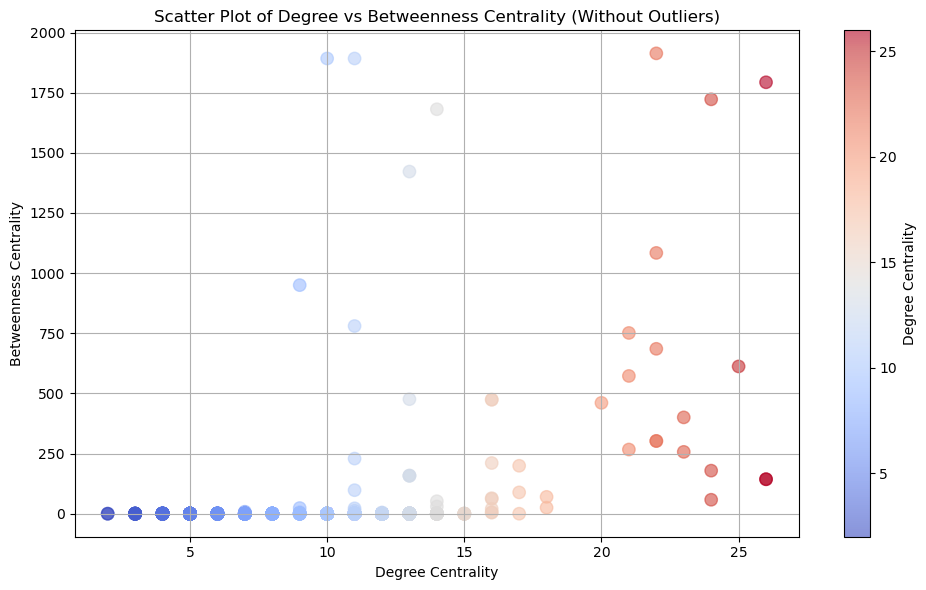

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming vertex_degree and vertex_betweenness are already defined

# Step 1: Define a threshold for outliers (95th percentile)
degree_threshold = np.percentile(vertex_degree, 95)  # 95th percentile for degree
betweenness_threshold = np.percentile(vertex_betweenness, 95)  # 95th percentile for betweenness

# Step 2: Filter out outliers
filtered_degree = []
filtered_betweenness = []
filtered_colors = []

for i, (deg, betw) in enumerate(zip(vertex_degree, vertex_betweenness)):
    if deg <= degree_threshold and betw <= betweenness_threshold:
        filtered_degree.append(deg)
        filtered_betweenness.append(betw)
        filtered_colors.append(deg)  # Use degree as color gradient

# Step 3: Increase figure size
plt.figure(figsize=(10, 6))  # Larger figure for better readability

# Step 4: Adjust point size and transparency
point_size = 80  # Increase point size
alpha = 0.6  # Set transparency

# Step 5: Scatter plot with color gradient and transparency
scatter = plt.scatter(filtered_degree, filtered_betweenness, c=filtered_colors, cmap='coolwarm', s=point_size, alpha=alpha)

# Step 6: Add a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Degree Centrality')

# Step 7: Add labels and title
plt.xlabel('Degree Centrality')
plt.ylabel('Betweenness Centrality')
plt.title('Scatter Plot of Degree vs Betweenness Centrality (Without Outliers)')

# Step 8: Add a grid for better readability
plt.grid(True)

# Step 9: Show the plot
plt.tight_layout()
plt.show()

Step 8: Visualizing the Network

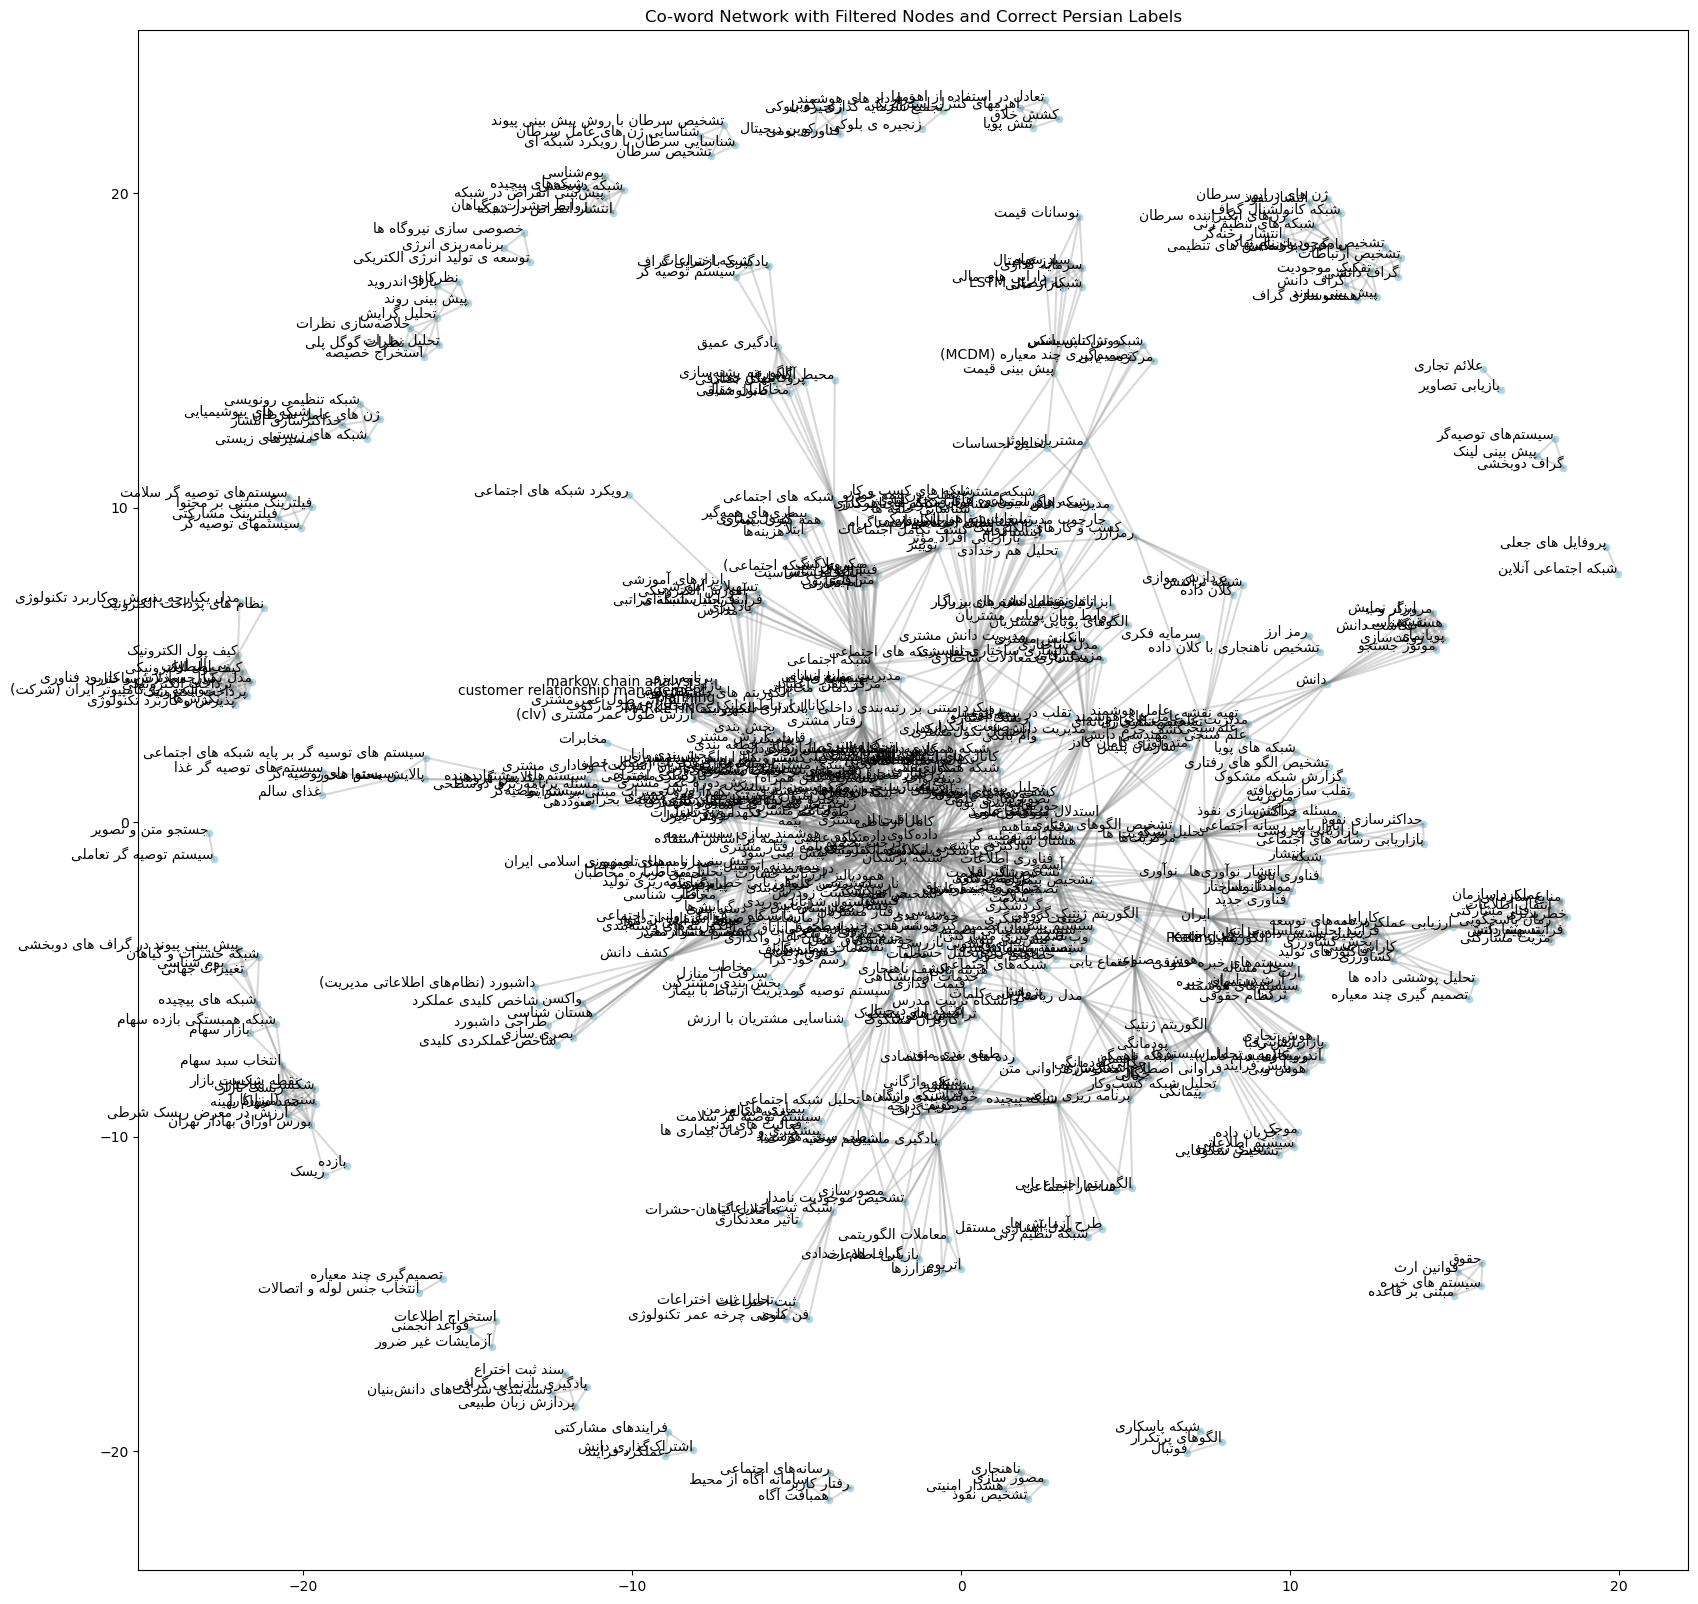

In [12]:
import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
from igraph import *

# Assuming co_word_graph and unique_keywords are already defined

# Reshape Persian labels for correct display
reshaped_labels = [get_display(arabic_reshaper.reshape(label)) for label in unique_keywords]

# Step 1: Increase the figure size for better visibility
plt.figure(figsize=(20, 20))  # Larger figure for better visualization

# Step 2: Reduce node size
node_size = 20  # Smaller node size to avoid clutter

# Step 3: Use the Fruchterman-Reingold layout to spread nodes
layout = co_word_graph.layout('fr')

# Step 4: Filter nodes with degree higher than a threshold
threshold = 2  # Only show nodes with degree > 2
high_degree_nodes = [v.index for v in co_word_graph.vs if v.degree() > threshold]

# Extract positions from layout for filtered nodes
positions = {i: layout[i] for i in high_degree_nodes}

# Step 5: Plot edges with transparency to reduce visual clutter
for edge in co_word_graph.es:
    source, target = edge.tuple
    if source in high_degree_nodes and target in high_degree_nodes:
        plt.plot([positions[source][0], positions[target][0]],
                 [positions[source][1], positions[target][1]],
                 color='gray', alpha=0.3)  # Transparent edges

# Plot high-degree nodes with reduced size
for vertex in high_degree_nodes:
    plt.scatter(*positions[vertex], s=node_size, color='lightblue')  # Smaller node size
    plt.text(positions[vertex][0], positions[vertex][1], reshaped_labels[vertex], fontsize=10, ha='right')

# Add title for context
plt.title('Co-word Network with Filtered Nodes and Correct Persian Labels')

# Show the plot
plt.show()

## Conclusion and Interpretation

### Interpretation of Results
After visualizing the co-word network, we can identify the most central keywords based on their **degree** and **betweenness centrality**. 

- **Degree Centrality** measures the number of direct connections a node (keyword) has within the network. Higher degree centrality indicates that a keyword is frequently co-occurring with other keywords in the academic literature, suggesting its importance within the field.
  
- **Betweenness Centrality** measures the extent to which a node lies on the shortest paths between other nodes. Keywords with high betweenness centrality act as bridges in the network, connecting different clusters of keywords and facilitating the flow of information.

#### Significance in Dr. Babak Teimourpour's Research
The most central keywords in the network may represent core themes and concepts in Dr. Teimourpour's research. Analyzing these keywords can provide insights into:
- The prevailing topics in his theses and papers.
- The interconnections between different areas of research, which can highlight interdisciplinary approaches.
- Potential gaps in the literature or emerging trends based on keyword co-occurrence.

### Matrix Multiplication for Single-mode Networks
In this exercise, we also performed matrix multiplication to obtain **single-mode networks** from the co-word matrix. This process involves:
- **Creating a co-occurrence matrix** where each entry represents the number of times pairs of keywords appear together across the theses.
- By multiplying the transposed binary keyword matrix with itself, we can derive a single-mode network that focuses solely on the relationships between keywords, ignoring the original document context.

#### Interpretation of Structure and Significance
The resulting single-mode network reveals:
- **Clusters of Keywords**: Groups of related keywords can be identified, indicating thematic areas of research.
- **Key Connections**: The relationships between keywords can highlight how different concepts are linked, which may inform future research directions.
- **Network Properties**: Analyzing properties like density and connectivity can provide further insights into the structure of the academic field surrounding Dr. Teimourpour’s work.

Overall, both the co-word network and single-mode network analyses allow for a comprehensive understanding of the academic landscape and the interconnectedness of research topics related to Dr. Babak Teimourpour.